# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Agglomerative Clustering_Customer Segmentation

# Agglomerative Clustering_Customer Segmentation

An e-commerce company has prepared a rough dataset containing shopping
details of it customers, which include CustomerID, Genre, Age, Annual Income (k$), and
Spending Score (1-100). The company is unable to target a specific set of customers with a particular
set of SKUs.

Objective: Segment customers into different groups based on their shopping trends.

In [1]:
import pandas as pd, numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.metrics import mean_squared_error


from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = "shopping_data.csv"
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
labels = data["Spending Score (1-100)"]
labels

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [5]:
print("Unique values in labels:", np.unique(labels.values))

Unique values in labels: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 22 23 24 26 27 28
 29 31 32 34 35 36 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 63 65 66 68 69 71 72 73 74 75 76 77 78 79 81 82 83 85 86
 87 88 89 90 91 92 93 94 95 97 98 99]


In [6]:
print("No of Unique values in labels:", len(np.unique(labels.values)) ) 

No of Unique values in labels: 84


In [7]:
data["Spending Score (1-100)"] = data["Spending Score (1-100)"].apply(lambda x : round(x/10) ) 
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,4
1,2,Male,21,15,8
2,3,Female,20,16,1
3,4,Female,23,16,8
4,5,Female,31,17,4


In [8]:
# labels = df["Spending Score (1-100)"]
# labels

In [9]:
print("Unique values in labels:", np.unique(labels.values))

Unique values in labels: [ 0  1  2  3  4  5  6  7  8  9 10]


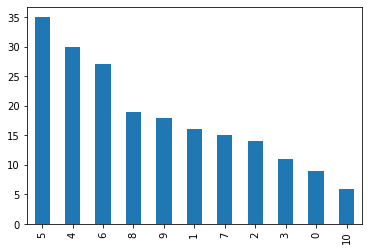

In [10]:
fig,axes = plt.subplots()
(labels.value_counts()).plot(ax=axes, kind='bar')

In [11]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,4
1,2,Male,21,15,8
2,3,Female,20,16,1
3,4,Female,23,16,8
4,5,Female,31,17,4


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(data['Genre'])
data['Genre']=pd.Categorical(le.transform(data['Genre']))


In [14]:
features = data.values[:, 1:-1]
features.shape

(200, 3)

In [15]:
model = AgglomerativeClustering(n_clusters=7,linkage="average", affinity="cosine")
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [16]:
model.labels_

array([2, 2, 2, 5, 0, 2, 0, 5, 4, 1, 4, 0, 4, 5, 0, 2, 0, 2, 3, 0, 0, 5,
       0, 1, 3, 5, 0, 1, 0, 2, 3, 2, 0, 6, 0, 2, 0, 5, 1, 2, 3, 2, 0, 5,
       0, 2, 0, 2, 5, 5, 0, 5, 5, 0, 0, 1, 0, 0, 2, 0, 0, 6, 0, 0, 0, 6,
       1, 0, 6, 5, 0, 1, 0, 0, 0, 2, 1, 5, 2, 1, 0, 5, 0, 1, 2, 1, 1, 2,
       5, 1, 0, 6, 1, 5, 2, 2, 1, 2, 1, 6, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0,
       0, 6, 5, 6, 6, 6, 1, 1, 1, 1, 2, 5, 5, 5, 2, 2, 5, 5, 1, 5, 5, 5,
       2, 2, 6, 2, 5, 2, 6, 2, 1, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 5, 5, 2,
       5, 2, 2, 2, 2, 2, 1, 2, 6, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2,
       1, 2, 1, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [17]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [18]:
score = mean_squared_error(labels, model.labels_)
abs_error = np.sqrt(score)
print("abs_error :", abs_error)

abs_error : 4.250294107470682
